In [1]:
import pandas as pd
import numpy as np

In [2]:
final = pd.read_csv("C:/Users/Jeff/Desktop/2021 Spring/QTW_DS7333/final/final_project.csv")

In [3]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)        

In [4]:
final['x37'] = final['x37'].apply(clean_currency).astype('float')
final['x32'] = final['x32'].str.replace('%','')# if converting to float need to divide by 100
final.fillna(0, inplace = True)

In [5]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      160000 non-null  float64
 1   x1      160000 non-null  float64
 2   x2      160000 non-null  float64
 3   x3      160000 non-null  float64
 4   x4      160000 non-null  float64
 5   x5      160000 non-null  float64
 6   x6      160000 non-null  float64
 7   x7      160000 non-null  float64
 8   x8      160000 non-null  float64
 9   x9      160000 non-null  float64
 10  x10     160000 non-null  float64
 11  x11     160000 non-null  float64
 12  x12     160000 non-null  float64
 13  x13     160000 non-null  float64
 14  x14     160000 non-null  float64
 15  x15     160000 non-null  float64
 16  x16     160000 non-null  float64
 17  x17     160000 non-null  float64
 18  x18     160000 non-null  float64
 19  x19     160000 non-null  float64
 20  x20     160000 non-null  float64
 21  x21     16

import sweetviz as sv

my_report = sv.analyze(final)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

In [6]:
continuous_features = final.select_dtypes('number')
categorical = final.select_dtypes('object')

In [7]:
continuous_features.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [9]:
categorical.head()

,x24,x29,x30,x32
0,euorpe,July,tuesday,0.0
1,asia,Aug,wednesday,-0.02
2,asia,July,wednesday,-0.01
3,asia,July,wednesday,0.01
4,asia,July,tuesday,0.01


# Prep data

In [8]:
# one hot encode categoricals
one_hot = pd.get_dummies(categorical)
df = pd.concat([continuous_features, one_hot], axis=1)

In [9]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x32_-0.02,x32_-0.03,x32_-0.04,x32_-0.05,x32_0.0,x32_0.01,x32_0.02,x32_0.03,x32_0.04,x32_0.05
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,0,0,0,0,1,0,0,0,0,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,1,0,0,0,0,0,0,0,0,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,0,0,0,0,0,0,0,0,0,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,0,0,0,0,0,1,0,0,0,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,0,0,0,0,0,1,0,0,0,0


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

target = df['y']
df2 = df.drop(columns=['y'])
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df2)

x_train, x_test,y_train, y_test = train_test_split(x_scaled, target.values, test_size=0.20, random_state=42)

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

## Random Forest

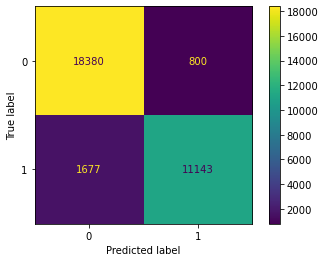

In [32]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

clf = RandomForestClassifier(n_jobs = -1)
clf.fit(x_train, y_train)
plot_confusion_matrix(clf, x_test, y_test) 

## AdaBoost

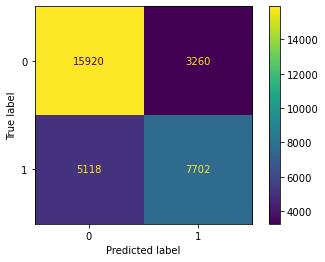

In [61]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf =  AdaBoostClassifier()
ada_clf.fit(x_train, y_train)
plot_confusion_matrix(ada_clf, x_test, y_test) 

## Logistic Regression

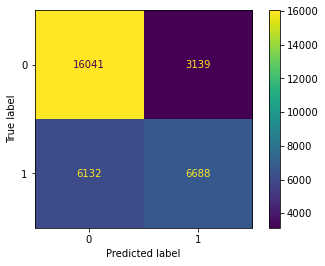

In [31]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
plot_confusion_matrix(lr_clf, x_test, y_test) 

## Naive Bayes

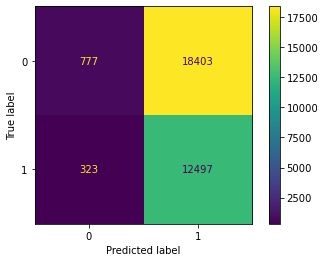

In [33]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train)
plot_confusion_matrix(nb_clf, x_test, y_test) 

## KNN

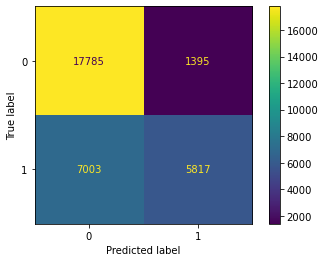

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=2, n_jobs = -1)
knn_clf.fit(x_train, y_train)
plot_confusion_matrix(knn_clf, x_test, y_test) 

## SVM

C:\Users\Jeff\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


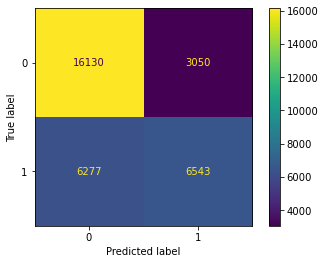

In [59]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(dual=True)
svm_clf.fit(x_train, y_train)
plot_confusion_matrix(svm_clf, x_test, y_test) 

## ANN Initial model

In [12]:
from keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import initializers
import tensorflow as tf

In [110]:
model = tf.keras.Sequential()
model.add(layers.Dense(100,kernel_initializer=initializers.RandomNormal(stddev=0.05), activation = 'elu', input_shape = (82,)))
model.add(layers.Dense(55,kernel_initializer=initializers.RandomNormal(stddev=0.01),activation = 'elu'))
model.add(layers.Dense(1,activation = 'sigmoid',kernel_initializer=initializers.RandomNormal(stddev=0.001)))

#%% Compile Model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

epochs = 500

model.compile(optimizer = opt,
              loss = 'binary_crossentropy',
              metrics = ['Precision','Recall']) #is there a better optimizer or loss? tf.keras.metrics.AUC()


#%% Fit model
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_loss', patience = 10) #set patience higher if batch size is smaller

history = model.fit(x_train, y_train, epochs = epochs, validation_data = (x_test,y_test),
                     batch_size = 100, callbacks = es)

preds = model.predict(x_test)

Epoch 1/500
1280/1280 [==============================] - 2s 1ms/step - loss: 0.5047 - precision: 0.7256 - recall: 0.5939 - val_loss: 0.3026 - val_precision: 0.8450 - val_recall: 0.8420
Epoch 2/500
1280/1280 [==============================] - 1s 953us/step - loss: 0.2915 - precision: 0.8534 - recall: 0.8373 - val_loss: 0.2360 - val_precision: 0.8958 - val_recall: 0.8673
Epoch 3/500
1280/1280 [==============================] - 1s 922us/step - loss: 0.2375 - precision: 0.8881 - recall: 0.8724 - val_loss: 0.2093 - val_precision: 0.9073 - val_recall: 0.8930
Epoch 4/500
1280/1280 [==============================] - 1s 940us/step - loss: 0.2051 - precision: 0.9065 - recall: 0.8950 - val_loss: 0.1868 - val_precision: 0.9135 - val_recall: 0.9115
Epoch 5/500
1280/1280 [==============================] - 1s 927us/step - loss: 0.1833 - precision: 0.9200 - recall: 0.9089 - val_loss: 0.1734 - val_precision: 0.9292 - val_recall: 0.9080
Epoch 6/500
1280/1280 [==============================] - 1s 941us/s

In [67]:
y_hat = (preds > 0.5)
y_hat = y_hat * 1

flatList = [ item for elem in y_hat for item in elem]

confusion_matrix(y_test, flatList) 

array([[18470,   710],
       [  592, 12228]], dtype=int64)

## ANN Second Model

In [109]:
model2 = tf.keras.Sequential()
model2.add(layers.Dense(100,kernel_initializer=initializers.RandomNormal(stddev=0.05), activation = 'elu', input_shape = (82,)))
model2.add(layers.Dropout(0.15))
model2.add(layers.Dense(55,kernel_initializer=initializers.RandomNormal(stddev=0.01),activation = 'elu'))
model2.add(layers.Dropout(0.15))
model2.add(layers.Dense(1,activation = 'sigmoid',kernel_initializer=initializers.RandomNormal(stddev=0.001)))

#%% Compile Model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

epochs = 500

model2.compile(optimizer = opt,
              loss = 'binary_crossentropy',
              metrics = ['Precision','Recall']) #is there a better optimizer or loss? tf.keras.metrics.AUC()


#%% Fit model
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_loss', patience = 10) #set patience higher if batch size is smaller

history2 = model2.fit(x_train, y_train, epochs = epochs, validation_data = (x_test,y_test),
                     batch_size = 100, callbacks = es)

preds = model2.predict(x_test)

Epoch 1/500
1280/1280 [==============================] - 3s 1ms/step - loss: 0.5257 - precision: 0.7114 - recall: 0.5663 - val_loss: 0.3222 - val_precision: 0.8368 - val_recall: 0.8169
Epoch 2/500
1280/1280 [==============================] - 2s 1ms/step - loss: 0.3341 - precision: 0.8326 - recall: 0.8078 - val_loss: 0.2603 - val_precision: 0.8734 - val_recall: 0.8650
Epoch 3/500
1280/1280 [==============================] - 2s 1ms/step - loss: 0.2845 - precision: 0.8609 - recall: 0.8439 - val_loss: 0.2258 - val_precision: 0.8958 - val_recall: 0.8832
Epoch 4/500
1280/1280 [==============================] - 2s 1ms/step - loss: 0.2541 - precision: 0.8777 - recall: 0.8647 - val_loss: 0.1973 - val_precision: 0.9107 - val_recall: 0.9009
Epoch 5/500
1280/1280 [==============================] - 2s 1ms/step - loss: 0.2261 - precision: 0.8937 - recall: 0.8814 - val_loss: 0.1812 - val_precision: 0.9228 - val_recall: 0.9066
Epoch 6/500
1280/1280 [==============================] - 1s 1ms/step - loss

1280/1280 [==============================] - 2s 1ms/step - loss: 0.0912 - precision: 0.9669 - recall: 0.9624 - val_loss: 0.0854 - val_precision: 0.9735 - val_recall: 0.9650
Epoch 90/500
1280/1280 [==============================] - 2s 1ms/step - loss: 0.0893 - precision: 0.9687 - recall: 0.9620 - val_loss: 0.0862 - val_precision: 0.9729 - val_recall: 0.9645
Epoch 91/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.0902 - precision: 0.9690 - recall: 0.9637 - val_loss: 0.0851 - val_precision: 0.9715 - val_recall: 0.9666
Epoch 92/500
1280/1280 [==============================] - 2s 1ms/step - loss: 0.0914 - precision: 0.9677 - recall: 0.9614 - val_loss: 0.0835 - val_precision: 0.9714 - val_recall: 0.9670
Epoch 93/500
1280/1280 [==============================] - 2s 1ms/step - loss: 0.0886 - precision: 0.9688 - recall: 0.9634 - val_loss: 0.0836 - val_precision: 0.9707 - val_recall: 0.9691
Epoch 94/500
1280/1280 [==============================] - 2s 1ms/step - loss: 0.089

In [26]:
y_hat = (preds > 0.5)
y_hat = y_hat * 1

flatList = [ item for elem in y_hat for item in elem]

confusion_matrix(y_test, flatList) 

array([[18829,   351],
       [  423, 12397]], dtype=int64)

## ANN Third Model

In [92]:
model3 = tf.keras.Sequential()
model3.add(layers.Dense(100,kernel_initializer=initializers.RandomNormal(stddev=0.05), activation = 'elu', input_shape = (82,)))
model3.add(layers.Dropout(0.25))
model3.add(layers.Dense(55,kernel_initializer=initializers.RandomNormal(stddev=0.01),activation = 'elu'))
model3.add(layers.Dropout(0.15))
model3.add(layers.Dense(1,activation = 'sigmoid',kernel_initializer=initializers.RandomNormal(stddev=0.001)))

#%% Compile Model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

epochs = 500

model3.compile(optimizer = opt,
              loss = 'binary_crossentropy',
              metrics = ['Precision','Recall'])#is there a better optimizer or loss? tf.keras.metrics.AUC()
#'Precision','Recall'

#%% Fit model
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_loss', patience = 50) #set patience higher if batch size is smaller

history3 = model3.fit(x_train, y_train, epochs = epochs, validation_data = (x_test,y_test),
                     batch_size = 100, callbacks = es)

preds = model3.predict(x_test)

Epoch 1/500
1280/1280 [==============================] - 2s 1ms/step - loss: 0.5354 - precision: 0.7072 - recall: 0.5642 - val_loss: 0.3321 - val_precision: 0.8455 - val_recall: 0.8020
Epoch 2/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.3529 - precision: 0.8209 - recall: 0.7928 - val_loss: 0.2681 - val_precision: 0.8619 - val_recall: 0.8644
Epoch 3/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.2924 - precision: 0.8541 - recall: 0.8381 - val_loss: 0.2304 - val_precision: 0.8982 - val_recall: 0.8711
Epoch 4/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.2669 - precision: 0.8700 - recall: 0.8555 - val_loss: 0.2090 - val_precision: 0.9073 - val_recall: 0.8888
Epoch 5/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.2463 - precision: 0.8822 - recall: 0.8705 - val_loss: 0.1947 - val_precision: 0.9096 - val_recall: 0.9062
Epoch 6/500
1280/1280 [==============================] - 1s 1ms/step - loss

1280/1280 [==============================] - 1s 1ms/step - loss: 0.1056 - precision: 0.9608 - recall: 0.9551 - val_loss: 0.0868 - val_precision: 0.9705 - val_recall: 0.9635
Epoch 90/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.1096 - precision: 0.9577 - recall: 0.9522 - val_loss: 0.0858 - val_precision: 0.9712 - val_recall: 0.9640
Epoch 91/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.1070 - precision: 0.9609 - recall: 0.9539 - val_loss: 0.0861 - val_precision: 0.9713 - val_recall: 0.9640
Epoch 92/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.1076 - precision: 0.9580 - recall: 0.9537 - val_loss: 0.0880 - val_precision: 0.9732 - val_recall: 0.9620
Epoch 93/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.1084 - precision: 0.9605 - recall: 0.9536 - val_loss: 0.0864 - val_precision: 0.9682 - val_recall: 0.9665
Epoch 94/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.107

Epoch 133/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.0995 - precision: 0.9645 - recall: 0.9582 - val_loss: 0.0837 - val_precision: 0.9731 - val_recall: 0.9665
Epoch 134/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.0983 - precision: 0.9640 - recall: 0.9598 - val_loss: 0.0842 - val_precision: 0.9726 - val_recall: 0.9669
Epoch 135/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.0998 - precision: 0.9639 - recall: 0.9577 - val_loss: 0.0838 - val_precision: 0.9728 - val_recall: 0.9666
Epoch 136/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.1006 - precision: 0.9637 - recall: 0.9587 - val_loss: 0.0847 - val_precision: 0.9736 - val_recall: 0.9633
Epoch 137/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.0984 - precision: 0.9646 - recall: 0.9580 - val_loss: 0.0842 - val_precision: 0.9743 - val_recall: 0.9632
Epoch 138/500
1280/1280 [==============================] - 1s 1ms

Epoch 177/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.0936 - precision: 0.9659 - recall: 0.9617 - val_loss: 0.0813 - val_precision: 0.9734 - val_recall: 0.9674
Epoch 178/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.0961 - precision: 0.9663 - recall: 0.9604 - val_loss: 0.0822 - val_precision: 0.9743 - val_recall: 0.9680
Epoch 179/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.0938 - precision: 0.9669 - recall: 0.9611 - val_loss: 0.0819 - val_precision: 0.9754 - val_recall: 0.9669
Epoch 180/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.0928 - precision: 0.9659 - recall: 0.9606 - val_loss: 0.0816 - val_precision: 0.9747 - val_recall: 0.9671
Epoch 181/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.0939 - precision: 0.9650 - recall: 0.9612 - val_loss: 0.0823 - val_precision: 0.9747 - val_recall: 0.9665
Epoch 182/500
1280/1280 [==============================] - 1s 1ms

Epoch 221/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.0910 - precision: 0.9681 - recall: 0.9626 - val_loss: 0.0810 - val_precision: 0.9731 - val_recall: 0.9700
Epoch 222/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.0907 - precision: 0.9672 - recall: 0.9622 - val_loss: 0.0802 - val_precision: 0.9741 - val_recall: 0.9700
Epoch 223/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.0889 - precision: 0.9679 - recall: 0.9648 - val_loss: 0.0815 - val_precision: 0.9726 - val_recall: 0.9690
Epoch 224/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.0951 - precision: 0.9661 - recall: 0.9613 - val_loss: 0.0806 - val_precision: 0.9754 - val_recall: 0.9686
Epoch 225/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.0930 - precision: 0.9670 - recall: 0.9608 - val_loss: 0.0799 - val_precision: 0.9748 - val_recall: 0.9675
Epoch 226/500
1280/1280 [==============================] - 1s 1ms

Epoch 265/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.0872 - precision: 0.9695 - recall: 0.9644 - val_loss: 0.0800 - val_precision: 0.9756 - val_recall: 0.9693
Epoch 266/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.0869 - precision: 0.9697 - recall: 0.9642 - val_loss: 0.0793 - val_precision: 0.9766 - val_recall: 0.9677
Epoch 267/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.0891 - precision: 0.9695 - recall: 0.9641 - val_loss: 0.0803 - val_precision: 0.9750 - val_recall: 0.9697
Epoch 268/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.0885 - precision: 0.9686 - recall: 0.9652 - val_loss: 0.0810 - val_precision: 0.9770 - val_recall: 0.9656
Epoch 269/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.0877 - precision: 0.9692 - recall: 0.9642 - val_loss: 0.0795 - val_precision: 0.9759 - val_recall: 0.9682
Epoch 270/500
1280/1280 [==============================] - 1s 1ms

Epoch 309/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.0854 - precision: 0.9697 - recall: 0.9649 - val_loss: 0.0802 - val_precision: 0.9777 - val_recall: 0.9662
Epoch 310/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.0865 - precision: 0.9715 - recall: 0.9642 - val_loss: 0.0801 - val_precision: 0.9765 - val_recall: 0.9690
Epoch 311/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.0897 - precision: 0.9699 - recall: 0.9647 - val_loss: 0.0801 - val_precision: 0.9787 - val_recall: 0.9662
Epoch 312/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.0858 - precision: 0.9702 - recall: 0.9640 - val_loss: 0.0801 - val_precision: 0.9761 - val_recall: 0.9681
Epoch 313/500
1280/1280 [==============================] - 1s 1ms/step - loss: 0.0884 - precision: 0.9691 - recall: 0.9654 - val_loss: 0.0814 - val_precision: 0.9760 - val_recall: 0.9683
Epoch 314/500
1280/1280 [==============================] - 1s 1ms

In [108]:
#best precision/recall
y_hat = (preds > 0.65)
y_hat = y_hat * 1

flatList = [ item for elem in y_hat for item in elem]

confusion_matrix(y_test, flatList) 

array([[18965,   215],
       [  536, 12284]], dtype=int64)

In [118]:
import matplotlib.pyplot as plt

def performance_plots(model, epochs):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
    t = f.suptitle('Neural Net Performance', fontsize=12)
    f.subplots_adjust(top=0.85, wspace=0.3)

    epoch_list = list(range(1,epochs+1))
    ax1.plot(epoch_list, model.history['precision'], label='Train Precision')
    ax1.plot(epoch_list, model.history['val_precision'], label='Validation Precision')
    ax1.set_xticks(np.arange(0, epochs+1, 100))
    #ax1.set_xticklabels(labels=np.arange(0, epochs+1, 25),rotation=30)
    ax1.set_ylabel('Precision Value')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Precision')
    l1 = ax1.legend(loc="best")
    
    epoch_list3 = list(range(1,epochs+1))
    ax3.plot(epoch_list, model.history['recall'], label='Train Recall')
    ax3.plot(epoch_list, model.history['val_recall'], label='Validation Recall')
    ax3.set_xticks(np.arange(0, epochs+1, 100))
    #ax1.set_xticklabels(labels=np.arange(0, epochs+1, 25),rotation=30)
    ax3.set_ylabel('Recall Value')
    ax3.set_xlabel('Epoch')
    ax3.set_title('Recall')
    l3 = ax1.legend(loc="best")

    ax2.plot(epoch_list, model.history['loss'], label='Train Loss')
    ax2.plot(epoch_list, model.history['val_loss'], label='Validation Loss')
    ax2.set_xticks(np.arange(0, epochs+1, 100))
    #ax2.set_xticklabels(labels=np.arange(0, epochs+1, 25),rotation=30)
    ax2.set_ylabel('Loss Value')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss')
    l2 = ax2.legend(loc="best")

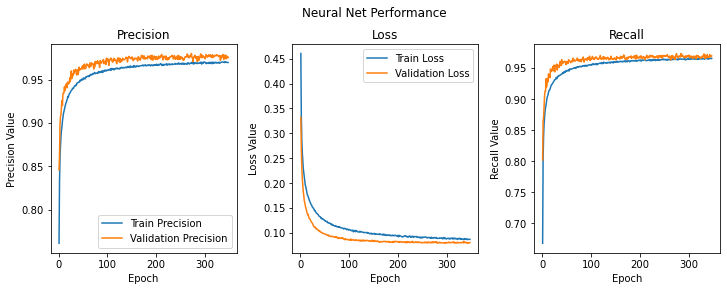

In [119]:
performance_plots(history3, len(history3.history['loss']))

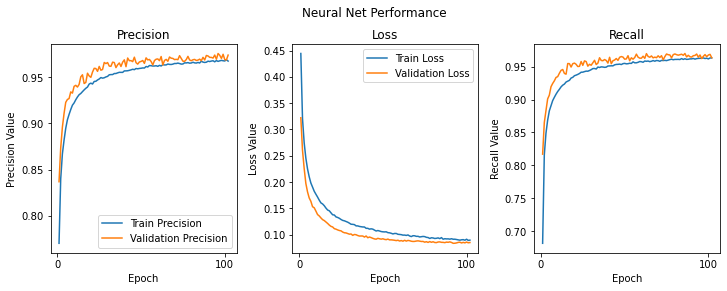

In [120]:
performance_plots(history2, len(history2.history['loss']))

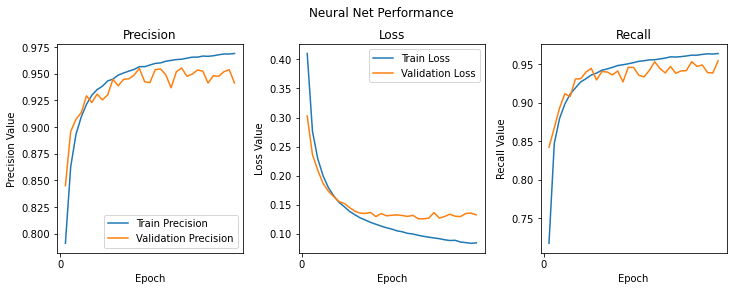

In [121]:
performance_plots(history, len(history.history['loss']))